### TD 5 - MARCEL MOREL ADJALLA

In [4]:
import dask.dataframe as dd

In [5]:
import os 
from dask.distributed import Client

num_cores = os.cpu_count()
print(f"Vous avez {num_cores} coeurs disponibles.")

# Créer un client Dask avec autant de workers que de cœurs
client = Client(n_workers=num_cores)

# OU spécifier d'autres paramètres
# client = Client(n_workers=num_cores, threads_per_worker=1, memory_limit="2GB")

print(client)



Vous avez 12 coeurs disponibles.


/home/morel/miniconda3/lib/python3.12/site-packages/distributed/node.py:188: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41895 instead
  warnings.warn(


<Client: 'tcp://127.0.0.1:46687' processes=12 threads=12, memory=15.31 GiB>


### 3. Usage basique

In [6]:
df = dd.read_csv('vol01.csv')

In [7]:
df.head()

,ALT [ft],EGT_1 [deg C],EGT_2 [deg C],FMV_1 [mm],FMV_2 [mm],HPTACC_1 [%],HPTACC_2 [%],M [Mach],N1_1 [% rpm],N1_2 [% rpm],...,VIB_AN1_1 [mils],VIB_AN1_2 [mils],VIB_AN2_1 [ips],VIB_AN2_2 [ips],VIB_BN1_1 [mils],VIB_BN1_2 [mils],VIB_BN2_1 [ips],VIB_BN2_2 [ips],VSV_1 [mm],VSV_2 [mm]
0,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.637541,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
1,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.637541,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
2,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.592270
3,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
4,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748


In [8]:


result = df.groupby('ALT [ft]').mean()



In [9]:
result.compute()

,EGT_1 [deg C],EGT_2 [deg C],FMV_1 [mm],FMV_2 [mm],HPTACC_1 [%],HPTACC_2 [%],M [Mach],N1_1 [% rpm],N1_2 [% rpm],N2_1 [% rpm],...,VIB_AN1_1 [mils],VIB_AN1_2 [mils],VIB_AN2_1 [ips],VIB_AN2_2 [ips],VIB_BN1_1 [mils],VIB_BN1_2 [mils],VIB_BN2_1 [ips],VIB_BN2_2 [ips],VSV_1 [mm],VSV_2 [mm]
ALT [ft],,,,,,,,,,,,,,,,,,,,,
-23.183203,624.089720,646.255495,4.184419,4.167181,3.955259,34.638180,0.000000,23.638659,23.268110,54.129175,...,0.072908,0.000000,0.000000,0.255179,0.072908,0.000000,0.000000,0.255179,54.841671,54.904192
-18.546562,522.915270,629.356460,3.721907,4.281759,13.576883,34.436766,0.000000,20.930621,23.371085,47.964212,...,0.063935,0.007852,0.000000,0.215360,0.038137,0.007852,0.016264,0.235550,54.722880,54.625251
-13.909922,455.030296,604.080006,3.340158,4.318302,18.761545,34.371200,0.000000,18.924909,23.482675,42.733648,...,0.025414,0.004583,0.026664,0.180813,0.020831,0.002916,0.018331,0.218100,54.650832,54.309286
-9.273281,459.165128,515.484695,3.519823,3.805518,18.757023,33.914843,0.000797,20.859828,21.854212,43.861708,...,0.035070,0.009229,0.019842,0.157507,0.037223,0.017535,0.021534,0.259794,53.792965,53.728201
-4.636641,151.221978,167.811658,0.664343,0.761684,9.812895,34.463276,0.000818,7.567465,7.771416,12.989454,...,0.030615,0.011362,0.003314,0.039768,0.045765,0.019884,0.007101,0.082061,54.843205,54.842708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39420.717939,673.867921,673.967144,9.430265,9.448990,89.403080,98.857785,0.637469,101.819794,101.913563,80.391251,...,1.464987,0.163126,0.043011,0.014424,2.405977,1.091528,0.079989,0.127983,9.043635,8.363996
39425.354580,677.533867,678.365084,9.499597,9.533730,89.571474,98.847483,0.637688,102.516471,102.669763,80.599093,...,1.534494,0.150374,0.043859,0.015949,2.507365,1.172230,0.084300,0.118476,8.699101,8.066561
39429.991220,675.734082,676.188765,9.460387,9.497088,85.362855,98.886037,0.637105,102.185496,102.268745,80.431121,...,1.441343,0.151425,0.053279,0.014021,2.445236,1.144101,0.067300,0.123383,8.617530,7.927390


Filtrage des données :

In [10]:
filtered_data = df[df['ALT [ft]'] > 1000].compute()

Jointure des données :

In [11]:
df1 = df[df['ALT [ft]'] > 1000]
df2 = df[df['ALT [ft]'] < 1500]
joined_data = df1.merge(df2, on='ALT [ft]').compute()

Barre de progression avec le scheduler distribué :

In [9]:
%pip install ipywidgets


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
from dask.distributed import progress

# Lire CSV
df_dask = dd.read_csv('vol01.csv')

# Filter, GroupBy and Calculer la moyenne (mean)
result_dask = df_dask[df_dask['ALT [ft]'] > 1500].groupby('ALT [ft]')["M [Mach]"].mean()

# Calculer le résultat
result_dask = result_dask.persist()

progress(result_dask)

VBox()

Barre de progression sur un scheduler à machine unique (Vous ne verrez pas la barre de progression si avez initialisez le Client) :

In [13]:


from dask.diagnostics import ProgressBar

with ProgressBar():
    # Lire CSV
    df_dask = dd.read_csv('vol01.csv')

    # Filter, GroupBy and Calculer la moyenne (mean)
    result_dask = df_dask[df_dask['ALT [ft]'] > 1500].groupby('ALT [ft]')["M [Mach]"].mean()

    # Calculer le résultat
    result_dask = result_dask.persist()



### 4. Dask Delayed

In [14]:
from dask import delayed

# Quelques fonctions simples
def inc(x):
    return x + 1

def add(x, y):
    return x + y

# Sans delayed
result = add(inc(1), inc(2))
print(result)  # Output: 5



5


Faisons la même chose mais en utilisant delayed 

In [15]:


# Avec delayed
inc_delayed = delayed(inc)
add_delayed = delayed(add)

# Ils ne calculent pas encore le résultat, mais construisent le graphe de calcul.
a = inc_delayed(1)
b = inc_delayed(2)
result_delayed = add_delayed(a, b)

# Calcul en parallèle (dans ce cas simple, il n'y a pas grand-chose à paralléliser)
result = result_delayed.compute()
print(result)  # Output: 5



5


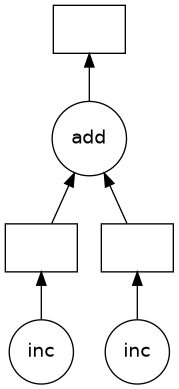

In [18]:
result_delayed.visualize()


### Exercices
### Exercice 1 : Extraction de fichiers Zip

In [19]:
import pandas as pd
import numpy as np
import zipfile, os
import dask.dataframe as dd



In [20]:
os.listdir()



['.ipynb_checkpoints',
 'TD5.ipynb',
 'script.py',
 'TD4.ipynb',
 'vol01.csv',
 'data',
 'TD2_MARCEL.ipynb',
 '.git',
 'TP3.ipynb',
 'mydask.png',
 'temp1',
 'TD3.ipynb',
 'temp']

In [21]:
def extraire_fichiers_zip(repertoire_source, repertoire_destination):
    """
    Extrait tous les fichiers zip du répertoire source vers le répertoire de destination.

    Paramètres:
    - repertoire_source (str): Le répertoire dans lequel rechercher les fichiers zip.
    - repertoire_destination (str): Le répertoire où les fichiers zip doivent être extraits.

    Retourne:
    - None
    """
    #Créer le répertoire de destination s'il n'existe pas
    os.makedirs(repertoire_destination, exist_ok=True)

    # Parcourir tous les fichiers du répertoire source
    for nom_fichier in os.listdir(repertoire_source):
        chemin_fichier = os.path.join(repertoire_source, nom_fichier)

        # Vérifier que c'est un fichier zip
        if nom_fichier.lower().endswith(".zip"):
            print(f"Extraction de : {nom_fichier}")
            with zipfile.ZipFile(chemin_fichier, 'r') as zip_ref:
                zip_ref.extractall(repertoire_destination)

    print("Extraction terminée.")
    

In [22]:

# Définir le répertoire où les fichiers zip sont stockés
repertoire_source = 'temp/'

# Définir le répertoire où les fichiers doivent être extraits
repertoire_destination = 'data/data_extracted'

# Print la liste des fichiers dans le répertoire source
print("Fichiers dans repertoire_source:", os.listdir(repertoire_source))

# Appelez la fonction pour extraire tous les fichiers zip du source vers le répertoire de destination
extraire_fichiers_zip(repertoire_source, repertoire_destination)

# Print la liste des fichiers dans le répertoire de destination après extraction
print("Fichiers dans repertoire_destination après extraction:", os.listdir(repertoire_destination))

Fichiers dans repertoire_source: ['Aircraft_01.h5.zip', 'Aircraft_03.h5.zip', 'Aircraft_02.h5.zip']
Extraction de : Aircraft_01.h5.zip
Extraction de : Aircraft_03.h5.zip
Extraction de : Aircraft_02.h5.zip
Extraction terminée.
Fichiers dans repertoire_destination après extraction: ['Aircraft_03.h5', 'Aircraft_02.h5', 'Aircraft_01.h5']


### Exercice 2 : Lecture d'un fichier HDF5 avec Dask

Lisons le fichier HDF5 du premier avion "Aircraft 01" à l'aide de la fonction read_hdf de Dask

In [23]:
nom_du_fichier = 'Aircraft_01.h5'
chemin_fichier = os.path.join(repertoire_destination, nom_du_fichier)
ddf = dd.read_hdf(chemin_fichier,'*')



ImportError: An error occurred while calling the read_hdf method registered to the pandas backend.
Original Message: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [28]:
import tables

In [29]:
# def extraire_fichiers_zip(repertoire_source, repertoire_destination):
#      """
#      Extrait tous les fichiers zip du répertoire source vers le
#     répertoire de destination.

#         Paramètres:
#         - repertoire_source (str): Le répertoire dans lequel rechercher les
#     fichiers zip.
#         - repertoire_destination (str): Le répertoire où les fichiers zip
#     doivent être extraits.

#      Retourne:
#      - None
#      """

#      # Assurez-vous que le répertoire de destination existe; sinon, créez-le
#      if not os.path.exists(repertoire_destination):
#          os.makedirs(repertoire_destination)

#      # Boucle à travers tous les fichiers dans le répertoire source
#      for nom_fichier in os.listdir(repertoire_source):
#          chemin_fichier = os.path.join(repertoire_source, nom_fichier)

#          # Vérifiez si le fichier actuel est un fichier zip
#          if zipfile.is_zipfile(chemin_fichier):
#              # Ouvrez le fichier zip et faites extraire son contenu dans le répertoire de destination
#              with zipfile.ZipFile(chemin_fichier) as fichier_zip:
#                  fichier_zip.extractall(repertoire_destination)  #Extrait tous les fichiers dans le répertoire de destination
#                  print(f"{nom_fichier} a été extrait vers {repertoire_destination}.")

# # Définir le répertoire où les fichiers zip sont stockés
# repertoire_source = 'data/data_zip'

# # Définir le répertoire où les fichiers doivent être extraits
# repertoire_destination = 'data/data_extracted'

# # Print la liste des fichiers dans le répertoire source
# print("Fichiers dans repertoire_source:", os.listdir(repertoire_source))

# # Appelez la fonction pour extraire tous les fichiers zip du source vers le répertoire de destination
# extraire_fichiers_zip(repertoire_source, repertoire_destination)

# # Print la liste des fichiers dans le répertoire de destination après extraction
# print("Fichiers dans repertoire_destination après extraction:",
# os.listdir(repertoire_destination))




######
def lire_hdf_dask(nom_fichier, repertoire='data/data_extracted'):
    """
    Charge un fichier HDF5 dans un DataFrame Dask.

    Si le fichier HDF5 n'est pas partitionnable et qu'il n'y a pas déjà une version partitionnée,
    une version partitionnée sera créée dans le répertoire 'data/data_dask'.

    Paramètres:
    - nom_fichier (str): Nom du fichier HDF5.
    - repertoire (str, facultatif): Répertoire contenant le fichier HDF5. Par défaut, 'data/data_extracted'.

    Retour:
    - ddf: DataFrame Dask
    """
    repertoire_dask = 'data/data_dask/'

    # Vérifiez si le répertoire dask existe; sinon, créez-le
    if not os.path.exists(repertoire_dask):
        os.makedirs(repertoire_dask)

    fichier_partitionne = os.path.join(repertoire_dask, f"{nom_fichier[:-3]}_dask.h5")

    # Vérifiez si une version partitionnée du fichier existe
    if os.path.exists(fichier_partitionne):
        return dd.read_hdf(fichier_partitionne, '*')

    chemin_fichier = os.path.join(repertoire, nom_fichier)

    try:
        return dd.read_hdf(chemin_fichier, '*')
    except TypeError:
        with pd.HDFStore(chemin_fichier) as store:
            keys_store = store.keys()
            if not keys_store:
                raise ValueError(f"Aucun jeu de données trouvé dans HDFStore: {nom_fichier}")

            print("Ce HDFStore n'est pas partitionnable et ne peut être utilisé de manière monolithique qu'avec pandas.")
            print(f"Création d'un nouveau fichier de données:'{nom_fichier[:-3]}_dask.h5'")

            # Créez une version partitionnée du fichier
            with pd.HDFStore(fichier_partitionne, mode='w') as h:
                for key in keys_store:
                    h.put(key, store[key], format='table')
            print(f"Lecture du fichier de données:'{nom_fichier[:-3]}_dask.h5'")
            return dd.read_hdf(fichier_partitionne, '*')



In [30]:
# Testez la fonction
nom_du_fichier = 'Aircraft_01.h5'
ddf = lire_hdf_dask(nom_du_fichier)
print(f"DataFrame Dask du fichier {nom_du_fichier} a été chargé dans 'ddf'.")

Ce HDFStore n'est pas partitionnable et ne peut être utilisé de manière monolithique qu'avec pandas.
Création d'un nouveau fichier de données:'Aircraft_01_dask.h5'
Lecture du fichier de données:'Aircraft_01_dask.h5'
DataFrame Dask du fichier Aircraft_01.h5 a été chargé dans 'ddf'.


### Exercice 3 : Exploration de Dask DataFrame

1. Nombre de Partitions :

In [31]:
ddf.npartitions

1001

In [32]:
#récupérer les index de chaque partition
index_par_partition = ddf.map_partitions(lambda y: y.index)

#convertir en une seule liste d’index
tous_les_index = index_par_partition.compute()

#afficher les 10 premiers
print(tous_les_index[:10])

#compter le total
print("Nombre total d'index récupérés :", len(tous_les_index))


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='record_00')
Nombre total d'index récupérés : 7574733


In [33]:
ddf.columns

Index(['ALT [ft]', 'EGT_1 [deg C]', 'EGT_2 [deg C]', 'FMV_1 [mm]',
       'FMV_2 [mm]', 'HPTACC_1 [%]', 'HPTACC_2 [%]', 'M [Mach]',
       'N1_1 [% rpm]', 'N1_2 [% rpm]', 'N2_1 [% rpm]', 'N2_2 [% rpm]',
       'NAIV_1 [bool]', 'NAIV_2 [bool]', 'P0_1 [psia]', 'P0_2 [psia]',
       'PRV_1 [bool]', 'PRV_2 [bool]', 'PS3_1 [psia]', 'PS3_2 [psia]',
       'PT2_1 [mbar]', 'PT2_2 [mbar]', 'P_OIL_1 [psi]', 'P_OIL_2 [psi]',
       'Q_1 [lb/h]', 'Q_2 [lb/h]', 'T1_1 [deg C]', 'T1_2 [deg C]',
       'T2_1 [deg C]', 'T2_2 [deg C]', 'T3_1 [deg C]', 'T3_2 [deg C]',
       'T5_1 [deg C]', 'T5_2 [deg C]', 'TAT [deg C]', 'TBV_1 [%]', 'TBV_2 [%]',
       'TCASE_1 [deg C]', 'TCASE_2 [deg C]', 'TLA_1 [deg]', 'TLA_2 [deg]',
       'T_OIL_1 [deg C]', 'T_OIL_2 [deg C]', 'VBV_1 [mm]', 'VBV_2 [mm]',
       'VIB_AN1_1 [mils]', 'VIB_AN1_2 [mils]', 'VIB_AN2_1 [ips]',
       'VIB_AN2_2 [ips]', 'VIB_BN1_1 [mils]', 'VIB_BN1_2 [mils]',
       'VIB_BN2_1 [ips]', 'VIB_BN2_2 [ips]', 'VSV_1 [mm]', 'VSV_2 [mm]'],
      dtyp

In [34]:
len(ddf.columns)

55

In [35]:
ddf.dtypes

ALT [ft]            float64
EGT_1 [deg C]       float64
EGT_2 [deg C]       float64
FMV_1 [mm]          float64
FMV_2 [mm]          float64
HPTACC_1 [%]        float64
HPTACC_2 [%]        float64
M [Mach]            float64
N1_1 [% rpm]        float64
N1_2 [% rpm]        float64
N2_1 [% rpm]        float64
N2_2 [% rpm]        float64
NAIV_1 [bool]       float64
NAIV_2 [bool]       float64
P0_1 [psia]         float64
P0_2 [psia]         float64
PRV_1 [bool]        float64
PRV_2 [bool]        float64
PS3_1 [psia]        float64
PS3_2 [psia]        float64
PT2_1 [mbar]        float64
PT2_2 [mbar]        float64
P_OIL_1 [psi]       float64
P_OIL_2 [psi]       float64
Q_1 [lb/h]          float64
Q_2 [lb/h]          float64
T1_1 [deg C]        float64
T1_2 [deg C]        float64
T2_1 [deg C]        float64
T2_2 [deg C]        float64
T3_1 [deg C]        float64
T3_2 [deg C]        float64
T5_1 [deg C]        float64
T5_2 [deg C]        float64
TAT [deg C]         float64
TBV_1 [%]           

In [36]:
ddf.partitions[0].head()


,ALT [ft],EGT_1 [deg C],EGT_2 [deg C],FMV_1 [mm],FMV_2 [mm],HPTACC_1 [%],HPTACC_2 [%],M [Mach],N1_1 [% rpm],N1_2 [% rpm],...,VIB_AN1_1 [mils],VIB_AN1_2 [mils],VIB_AN2_1 [ips],VIB_AN2_2 [ips],VIB_BN1_1 [mils],VIB_BN1_2 [mils],VIB_BN2_1 [ips],VIB_BN2_2 [ips],VSV_1 [mm],VSV_2 [mm]
record_00,,,,,,,,,,,,,,,,,,,,,
0,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.637541,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
1,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.637541,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
2,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.592270
3,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
4,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748


### Exercice 4 : Manipulation avancée avec Dask et comparaison avec Pandas

In [39]:
# maximum de la colonne vitesse

max_alt_par_partition = ddf.map_partitions(lambda part: part["ALT [ft]"].max())


In [40]:
max_alt_par_partition.compute()

0    39439.264501
0    39457.811063
0    40825.620025
0    42012.600005
0    33629.553895
         ...     
0    35957.147450
0    39462.447704
0    39564.453796
0    35975.694012
0    39545.907234
Length: 1001, dtype: float64

In [41]:
%time max_alt_par_partition.compute()

CPU times: user 35.1 s, sys: 8.96 s, total: 44 s
Wall time: 43.8 s


0    39439.264501
0    39457.811063
0    40825.620025
0    42012.600005
0    33629.553895
         ...     
0    35957.147450
0    39462.447704
0    39564.453796
0    35975.694012
0    39545.907234
Length: 1001, dtype: float64

In [43]:
#2. Extraction de la ligne avec la vitesse maximale :
#sélection de la 676e partition (index 675)
part_676 = ddf.partitions[675]

#on la transforme en DataFrame pandas
part_676_pd = part_676.compute()

#on récupère la ligne où ALT est maximale
ligne_max_alt_676 = part_676_pd.loc[part_676_pd["ALT [ft]"].idxmax()]

print(ligne_max_alt_676)


ALT [ft]            35952.510809
EGT_1 [deg C]         623.597147
EGT_2 [deg C]         632.463457
FMV_1 [mm]              8.933677
FMV_2 [mm]              9.053041
HPTACC_1 [%]           94.738340
HPTACC_2 [%]           98.822145
M [Mach]                0.599814
N1_1 [% rpm]           94.625215
N1_2 [% rpm]           94.625215
N2_1 [% rpm]           78.863980
N2_2 [% rpm]           78.914997
NAIV_1 [bool]           0.000000
NAIV_2 [bool]           0.000000
P0_1 [psia]             3.525833
P0_2 [psia]             3.525833
PRV_1 [bool]            0.000000
PRV_2 [bool]            0.000000
PS3_1 [psia]          121.103663
PS3_2 [psia]          121.654134
PT2_1 [mbar]          396.591269
PT2_2 [mbar]          396.591269
P_OIL_1 [psi]          72.539681
P_OIL_2 [psi]          67.322786
Q_1 [lb/h]           2192.174146
Q_2 [lb/h]           2114.191666
T1_1 [deg C]          -23.582440
T1_2 [deg C]          -24.066084
T2_1 [deg C]           34.674128
T2_2 [deg C]           35.699989
T3_1 [deg 

In [45]:
def ligne_alt_max(part):
    idx = part["ALT [ft]"].idxmax()
    return part.loc[[idx]]   #double [] pour garder un DataFrame




In [47]:
lignes_max_par_partition = ddf.map_partitions(ligne_alt_max)

#pour vraiment calculer :
lignes_max_par_partition_result = lignes_max_par_partition.compute()
lignes_max_par_partition_result

,ALT [ft],EGT_1 [deg C],EGT_2 [deg C],FMV_1 [mm],FMV_2 [mm],HPTACC_1 [%],HPTACC_2 [%],M [Mach],N1_1 [% rpm],N1_2 [% rpm],...,VIB_AN1_1 [mils],VIB_AN1_2 [mils],VIB_AN2_1 [ips],VIB_AN2_2 [ips],VIB_BN1_1 [mils],VIB_BN1_2 [mils],VIB_BN2_1 [ips],VIB_BN2_2 [ips],VSV_1 [mm],VSV_2 [mm]
4122,39439.264501,691.572192,696.497919,9.867391,9.922411,98.881474,98.822145,0.640898,105.647571,105.729915,...,2.333069,0.000000,0.036454,0.036454,2.697611,1.385260,0.072908,0.109363,7.294161,6.773150
2375,39457.811063,661.032679,663.002970,9.510044,9.493522,74.042448,76.939675,0.632681,101.977374,101.906793,...,0.947809,0.437450,0.036454,0.036454,2.333069,0.874901,0.109363,0.109363,8.794674,8.211141
4427,40825.620025,671.869280,671.869280,9.371716,9.342831,98.881474,98.881474,0.616248,102.636127,102.859633,...,1.385260,0.145817,0.036454,0.072908,2.260160,1.093626,0.109363,0.072908,7.815173,7.231640
3710,42012.600005,649.210932,651.181223,8.864513,8.913941,98.822145,98.881474,0.616248,100.142275,100.212856,...,1.093626,0.291634,0.036454,0.036454,1.822710,0.947809,0.036454,0.182271,8.659211,8.075678
1640,33629.553895,628.522875,624.582293,9.221860,9.342831,72.183476,86.709164,0.599814,94.472291,94.625215,...,0.364542,0.656176,0.109363,0.072908,0.947809,0.801992,0.036454,0.109363,12.306292,13.087809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4061,35957.147450,565.473558,569.414141,8.357311,8.403911,67.615152,74.161105,0.558731,89.919834,90.060996,...,0.218725,0.656176,0.000000,0.000000,0.145817,0.656176,0.364542,0.182271,15.890851,15.567824
3200,39462.447704,624.582293,632.463457,9.291024,9.423972,72.865758,98.693599,0.624464,99.554102,99.695264,...,0.437450,0.583267,0.072908,0.000000,0.364542,1.020718,0.218725,0.218725,10.034682,10.295187
4860,39564.453796,667.928698,676.795008,9.152696,9.203731,87.757308,98.822145,0.608031,100.506942,100.506942,...,0.364542,0.656176,0.109363,0.000000,0.364542,0.947809,0.145817,0.109363,9.117701,9.961740
5034,35975.694012,703.393938,714.230540,10.881795,10.942472,48.887001,92.948585,0.608031,111.611641,111.611641,...,0.583267,0.947809,0.000000,0.000000,0.729084,0.874901,0.145817,0.036454,7.752651,7.617188


### 3- Comparaison avec Pandas :

In [48]:
import pandas as pd 

In [53]:
import h5py

file = h5py.File('data/data_extracted/Aircraft_01.h5', 'r')
list(file.keys())


['record_00',
 'record_01',
 'record_02',
 'record_03',
 'record_04',
 'record_05',
 'record_06',
 'record_07',
 'record_08',
 'record_09',
 'record_10',
 'record_100',
 'record_1000',
 'record_1001',
 'record_101',
 'record_102',
 'record_103',
 'record_104',
 'record_105',
 'record_106',
 'record_107',
 'record_108',
 'record_109',
 'record_11',
 'record_110',
 'record_111',
 'record_112',
 'record_113',
 'record_114',
 'record_115',
 'record_116',
 'record_117',
 'record_118',
 'record_119',
 'record_12',
 'record_120',
 'record_121',
 'record_122',
 'record_123',
 'record_124',
 'record_125',
 'record_126',
 'record_127',
 'record_128',
 'record_129',
 'record_13',
 'record_130',
 'record_131',
 'record_132',
 'record_133',
 'record_134',
 'record_135',
 'record_136',
 'record_137',
 'record_138',
 'record_139',
 'record_14',
 'record_140',
 'record_141',
 'record_142',
 'record_143',
 'record_144',
 'record_145',
 'record_146',
 'record_147',
 'record_148',
 'record_149',
 'record

In [54]:
df_pd = pd.read_hdf('data/data_extracted/Aircraft_01.h5', key='record_00')
df_pd.head()


,ALT [ft],EGT_1 [deg C],EGT_2 [deg C],FMV_1 [mm],FMV_2 [mm],HPTACC_1 [%],HPTACC_2 [%],M [Mach],N1_1 [% rpm],N1_2 [% rpm],...,VIB_AN1_1 [mils],VIB_AN1_2 [mils],VIB_AN2_1 [ips],VIB_AN2_2 [ips],VIB_BN1_1 [mils],VIB_BN1_2 [mils],VIB_BN2_1 [ips],VIB_BN2_2 [ips],VSV_1 [mm],VSV_2 [mm]
record_00,,,,,,,,,,,,,,,,,,,,,
0,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.637541,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
1,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.637541,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
2,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.592270
3,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748
4,-4.636641,33.494949,33.494949,-0.64553,-0.64913,4.696870,34.737062,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.59227,56.529748


In [55]:
# eliminons les vols qui n'ont pas de CEOD
try:
    df_pd = pd.read_hdf('data/data_extracted/Aircraft_01.h5', key='record_00')
    print("OK :", df_pd.shape)
except Exception as e:
    print("Erreur :", e)

OK : (7429, 55)


In [56]:
df_pd['ALT [ft]'].max()


39439.264501288

In [57]:
df_pd.loc[df_pd['ALT [ft]'].idxmax()]


ALT [ft]            39439.264501
EGT_1 [deg C]         691.572192
EGT_2 [deg C]         696.497919
FMV_1 [mm]              9.867391
FMV_2 [mm]              9.922411
HPTACC_1 [%]           98.881474
HPTACC_2 [%]           98.822145
M [Mach]                0.640898
N1_1 [% rpm]          105.647571
N1_2 [% rpm]          105.729915
N2_1 [% rpm]           81.465853
N2_2 [% rpm]           81.525373
NAIV_1 [bool]           0.000000
NAIV_2 [bool]           0.000000
P0_1 [psia]             3.059678
P0_2 [psia]             3.059678
PRV_1 [bool]            0.000000
PRV_2 [bool]            0.000000
PS3_1 [psia]          135.966385
PS3_2 [psia]          138.168270
PT2_1 [mbar]          359.834029
PT2_2 [mbar]          359.834029
P_OIL_1 [psi]          67.571210
P_OIL_2 [psi]          69.807022
Q_1 [lb/h]           2608.080703
Q_2 [lb/h]           2642.739583
T1_1 [deg C]          -17.053258
T1_2 [deg C]          -17.053258
T2_1 [deg C]           52.220467
T2_2 [deg C]           52.015295
T3_1 [deg 


## Exercice 5 : Analyse et Visualisation des Données avec Dask et Plotly
1. Suppression des colonnes :


In [58]:
list_var_e2 = [
                   'FMV_2 [mm]', 'HPTACC_2 [%]', 
                   'N1_2 [% rpm]','N2_2 [% rpm]',
                   'NAIV_2 [bool]', 'P0_2 [psia]',
                   'PRV_2 [bool]', 'PS3_2 [psia]',
                   'PT2_2 [mbar]', 'P_OIL_2 [psi]',
                   'Q_2 [lb/h]', 'T1_2 [deg C]',
                   'T2_2 [deg C]', 'T3_2 [deg C]',
                   'T5_2 [deg C]', 'TBV_2 [%]',
                   'TCASE_2 [deg C]', 'TLA_2 [deg]',
                   'T_OIL_2 [deg C]', 'VBV_2 [mm]',
                   'EGT_2 [deg C]','VIB_AN1_2 [mils]',
                   'VIB_AN2_2 [ips]', 'VIB_BN1_2 [mils]',
                   'VIB_BN2_2 [ips]', 'VSV_2 [mm]'
                ]



In [59]:
#suppression des colonnes du moteur 2
ddf_clean = ddf.drop(columns=list_var_e2, errors="ignore")

#vérification : nombre de colonnes restantes
len(ddf_clean.columns)

29

2. Visualisation de séries temporelles :

In [60]:
import matplotlib.pyplot as plt 

def tracer_serie_temporelle(ddf, numero_partition, colonnes):
    """
    Trace les séries temporelles des colonnes spécifiées
    pour une partition donnée d'un DataFrame Dask.
    """

    #récupérer la partition et la convertir en pandas
    df_part = ddf.partitions[numero_partition].compute()

    #tracer chaque colonne
    plt.figure(figsize=(12, 5))
    for col in colonnes:
        if col in df_part.columns:      # Vérification
            plt.plot(df_part.index, df_part[col], label=col)

    #mise en forme
    plt.title(f"Séries temporelles - Partition {numero_partition}")
    plt.xlabel("Index (temps)")
    plt.ylabel("Valeur")
    plt.legend()
    plt.grid(True)
    plt.show()


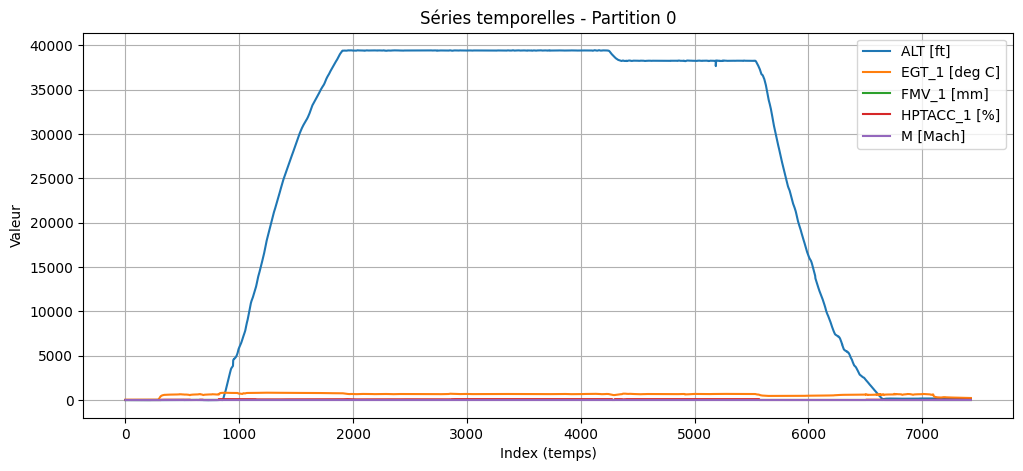

In [62]:
# test sur ddf_clean
tracer_serie_temporelle(
    ddf_clean, 
    0, 
    ['ALT [ft]', 'EGT_1 [deg C]', 'FMV_1 [mm]', 'HPTACC_1 [%]', 'M [Mach]']
)

3. Calcul de la longueur des vols :

In [64]:
#calcul de la longueur de chaque vol (une longueur par partition)
longueurs_vols = ddf_clean.map_partitions(len).compute()

longueurs_vols

0    7429
0    7459
0    7042
0    6457
0    4860
     ... 
0    7221
0    7981
0    7834
0    7918
0    5495
Length: 1001, dtype: int64

In [65]:
vol_avec_longueur_max = longueurs_vols.idxmax()
vol_avec_longueur_min = longueurs_vols.idxmin()

print(f"Vol {vol_avec_longueur_max} a la plus grande longueur de vol, qui est = {longueurs_vols[vol_avec_longueur_max]}")
print(f"Vol {vol_avec_longueur_min} a la plus petite longueur de vol, qui est = {longueurs_vols[vol_avec_longueur_min]}")


Vol 0 a la plus grande longueur de vol, qui est = 0    7429
0    7459
0    7042
0    6457
0    4860
     ... 
0    7221
0    7981
0    7834
0    7918
0    5495
Length: 1001, dtype: int64
Vol 0 a la plus petite longueur de vol, qui est = 0    7429
0    7459
0    7042
0    6457
0    4860
     ... 
0    7221
0    7981
0    7834
0    7918
0    5495
Length: 1001, dtype: int64


4. Visualisation de la distribution de la longueur des vols :

In [ ]:
%pip install plotly

In [67]:
import plotly.express as px

fig = px.box(
    longueurs_vols,
    points="all",
    title="Distribution de la longueur des vols",
    labels={"value": "Longueur du vol", "index": "Vol"}
)

fig.show()
